<a href="https://colab.research.google.com/github/IqbalHere/AIML-THETA-612/blob/main/Multilinear_regression_AND_Toyoto_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# a large toyota car delership rolled out used cars exchange offer for a new ar. to
# ensure a reasonable profit, the dealer needs to be able to predict the price that the
# dealership will get for used cars
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

Saving Cars.csv to Cars.csv
Cars.csv


In [ ]:
df=pd.read_csv(file_name)
df


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.shape

(81, 5)

In [ ]:
df.corr(numeric_only=True)


,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
#build model
import statsmodels.formula.api as smf


model=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

In [ ]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
(model.rsquared, model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [ ]:
# prompt: ' MPG&VOL ' , data cars) .fit()
# and p-Vaiues
# ml_v . pvalu•s)

#build model with interaction term
ml_v=smf.ols('MPG~VOL',data=df).fit() # Changed 'cars' to 'df'

print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
# prompt: ( ml_v. rsquared rsquared_adj )

(ml_v.rsquared, ml_v.rsquared_adj)


(0.27990086511227075, 0.27078568618964116)

In [ ]:
# prompt: 'MPG•WT• *data
# print (ml_w.tvalues, ml_w.pvalues)

ml_w = smf.ols('MPG~WT', data = df).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)



Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
ml_v = smf.ols("MPG~VOL",data = df).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [ ]:
ml_w = smf.ols("MPG~WT",data = df).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)
(ml_w.rsquared,ml_w.rsquared_adj)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


(0.2774751389270127, 0.2683292546096331)

In [ ]:
ml_wt=smf.ols("MPG~WT+VOL",data = df).fit()
print(ml_wt.tvalues, '\n', ml_wt.pvalues)
(ml_wt.rsquared,ml_wt.rsquared_adj)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


(0.2821095616445982, 0.2637021145072803)

In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_wt = smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)
rsq_vol = smf.ols('VOL~WT+SP+HP',data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)
rsq_sp = smf.ols('SP~WT+VOL+HP',data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)
d1 = {'Variables' : ['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
df_vif = pd.DataFrame(d1)
df_vif

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


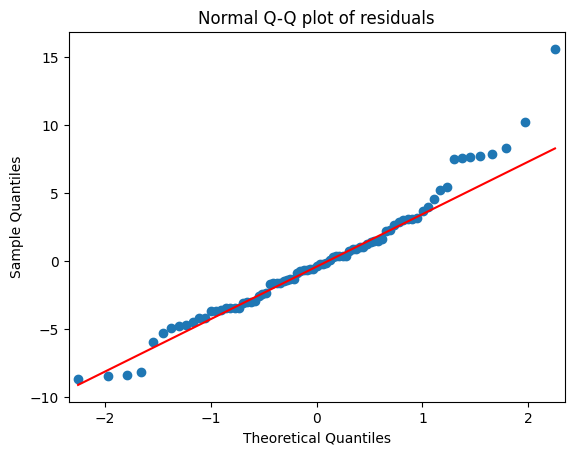

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

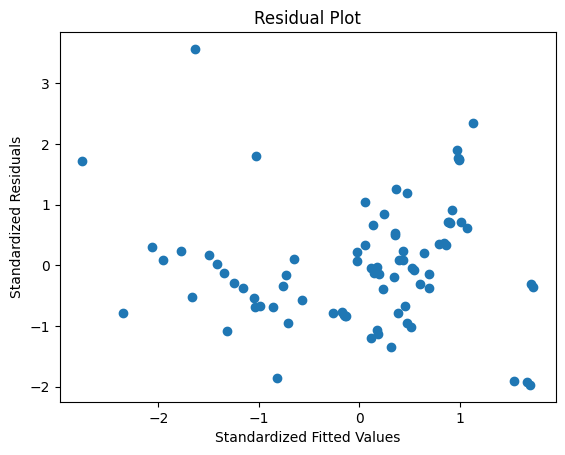

In [ ]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

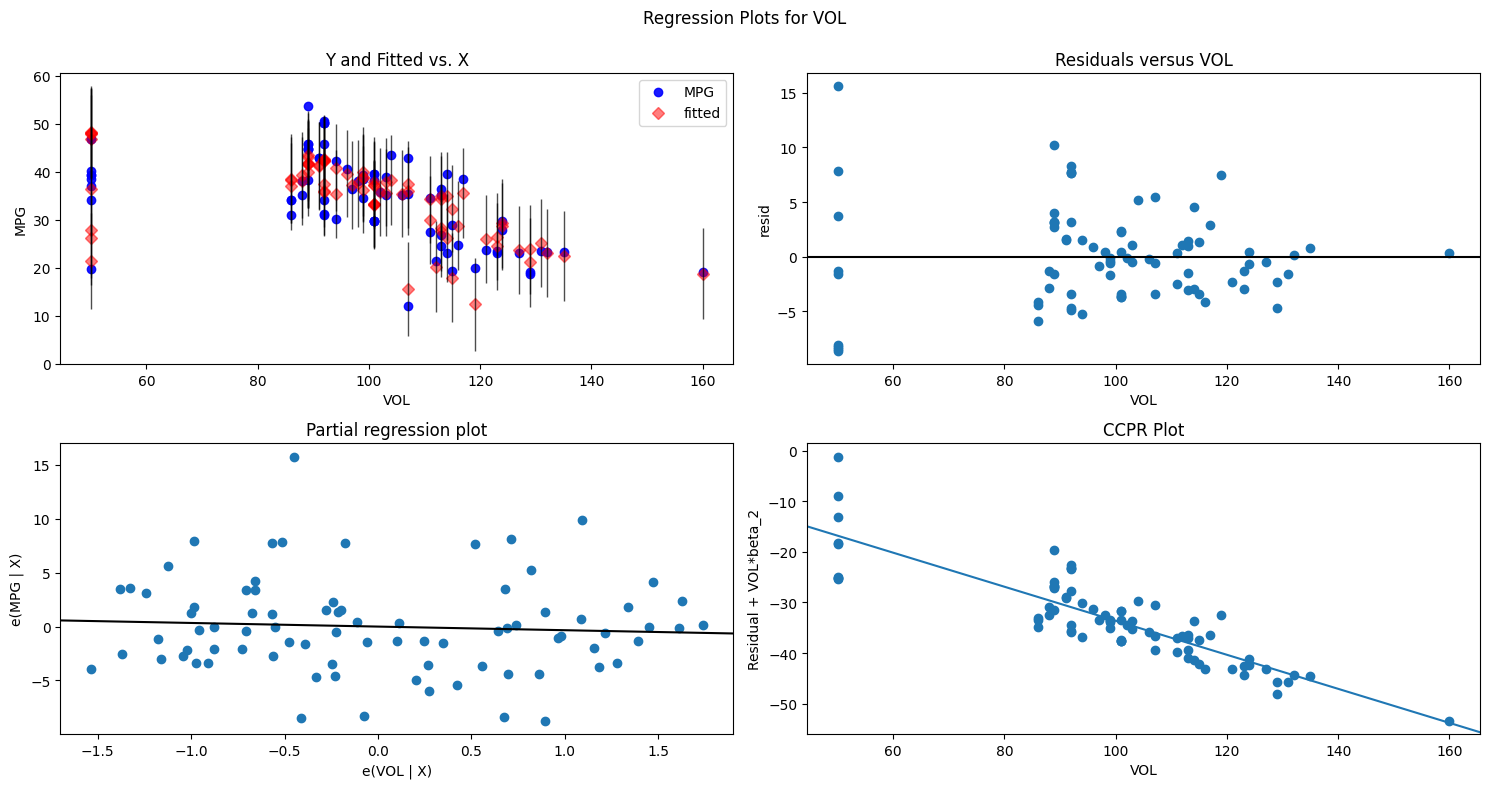

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

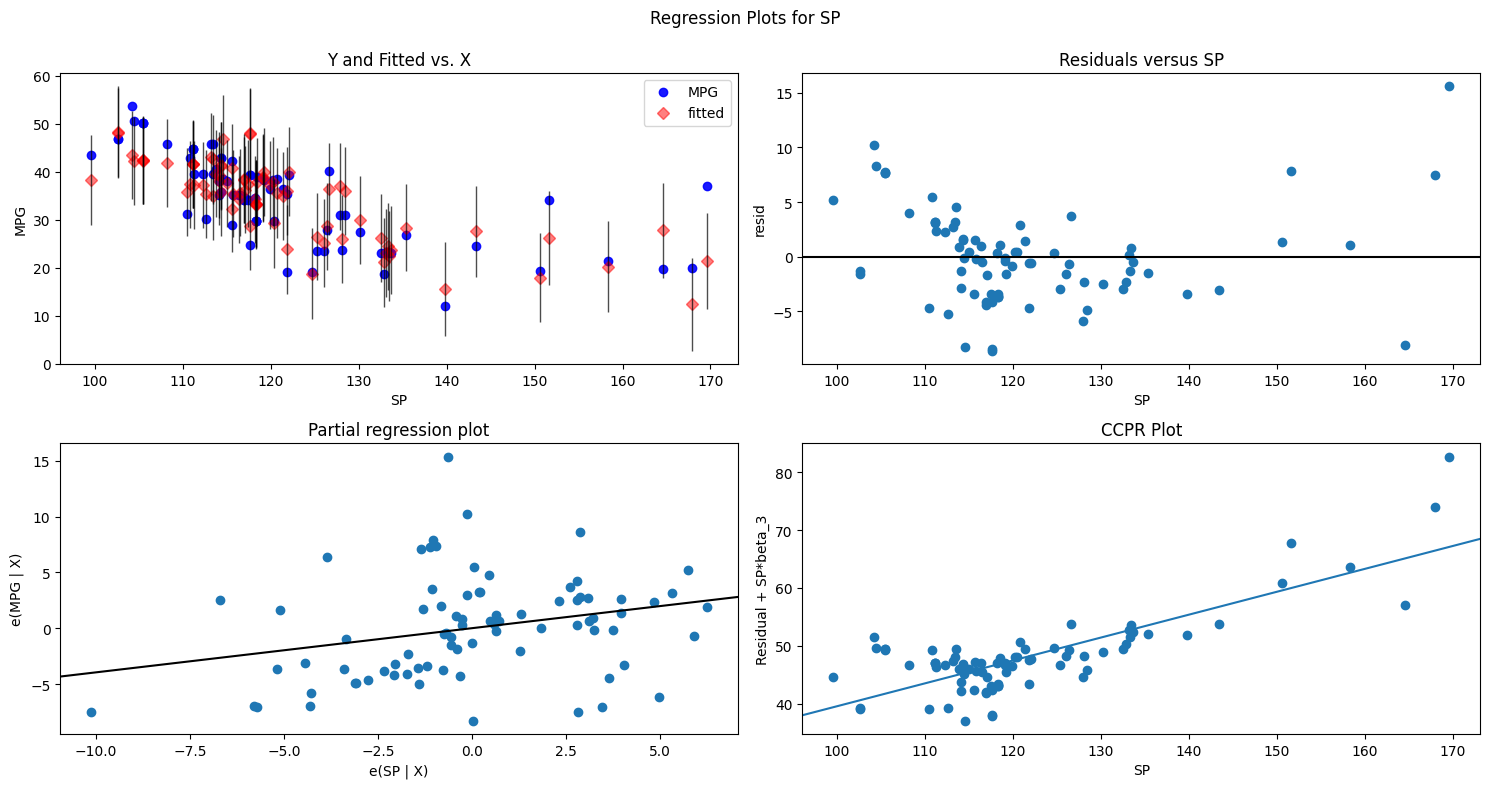

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

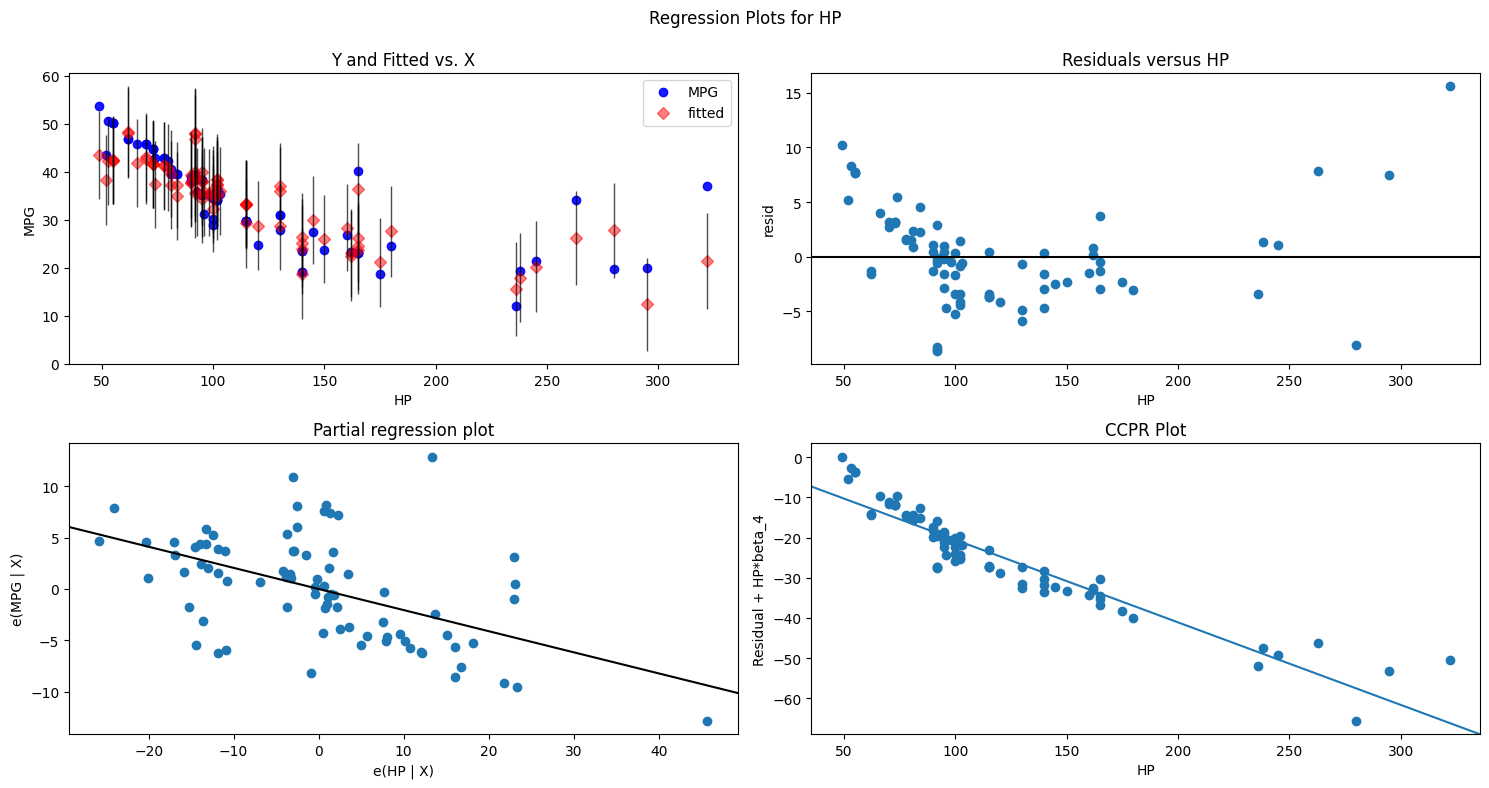

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

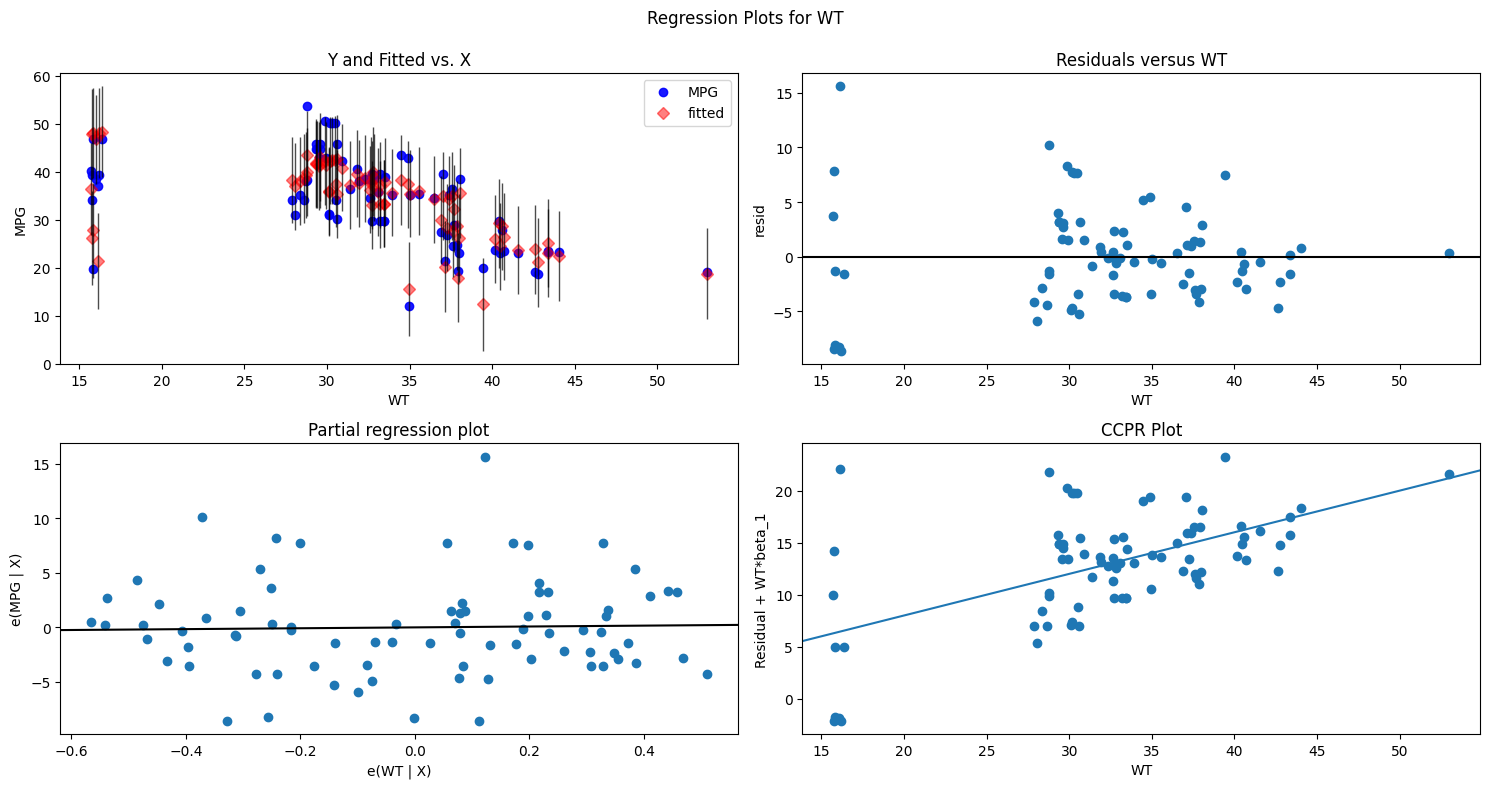

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

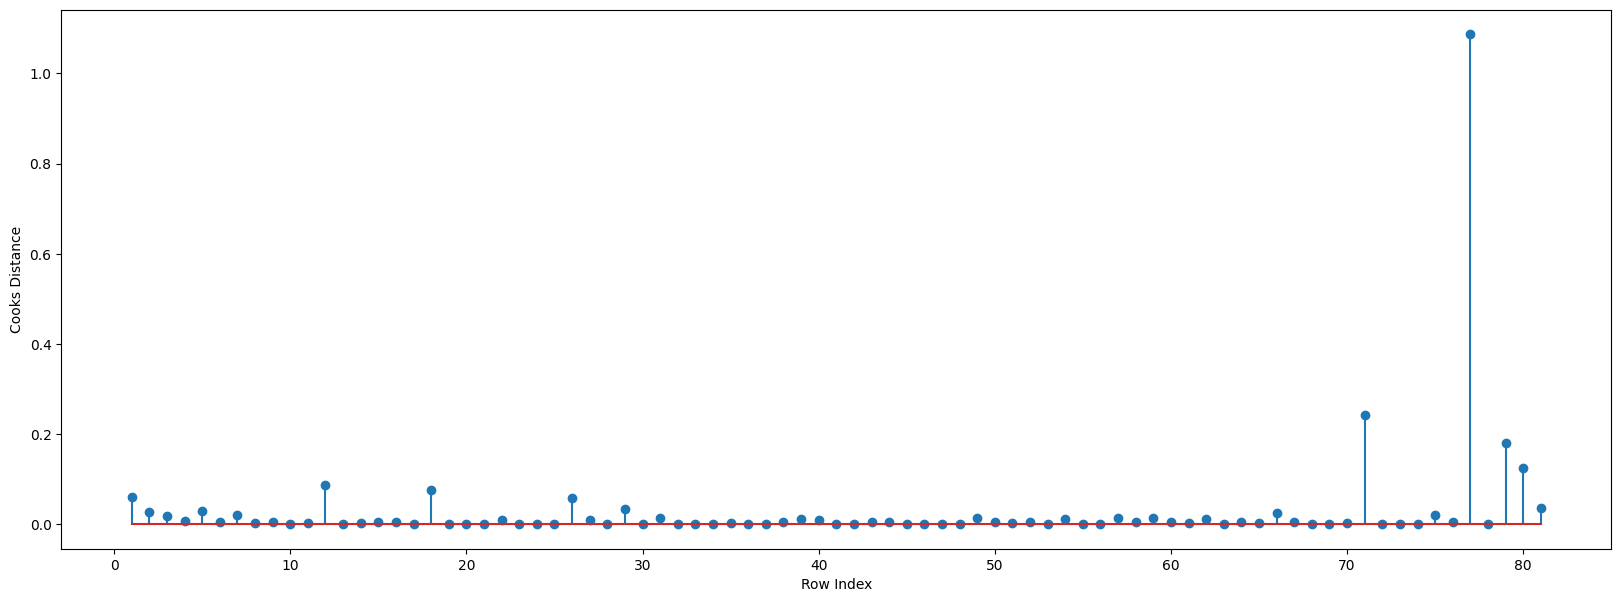

In [ ]:
model_influence = model.get_influence()

(c, _) = model_influence.cooks_distance

fig=plt.subplots(figsize=(20,7))

plt.stem(np.arange(1,df.shape[0]+1),np.round(c,3))

plt.xlabel('Row Index')

plt.ylabel('Cooks Distance')

plt.show()

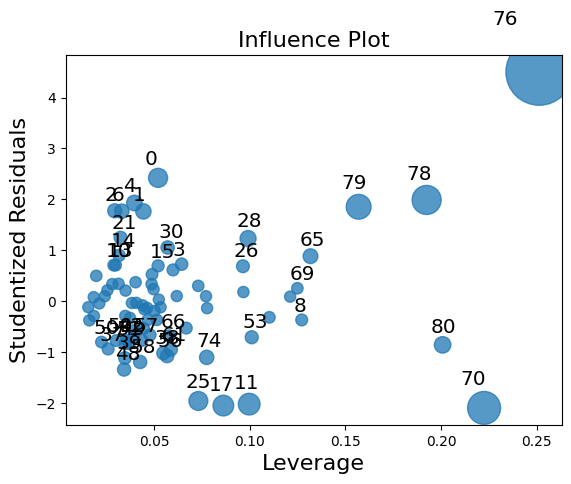

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model,alpha=0.5)
plt.show()

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
cars_new = pd.read_csv(file_name)



Saving Cars.csv to Cars (1).csv


In [ ]:
car1 = cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [ ]:
car1=car1.drop(['index'],axis=1)
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [ ]:
final_ml_V = smf.ols('MPG~VOL+SP+HP',data = car1).fit()
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161692010376008, 446.1172263944772)

**TOYOTA CAR**
[assignment 1]

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

df=pd.read_csv(file_name)
df

Saving Toyoto_Corrola.csv to Toyoto_Corrola (1).csv
Toyoto_Corrola (1).csv


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
df.shape

df.corr(numeric_only=True)

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [ ]:
import statsmodels.formula.api as smf


model=smf.ols('Price~KM+Doors+HP+Age_08_04+Gears+Weight',data=df).fit()
model.summary()






<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:49:50   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6984.3736   1312.036     -5.323      0.000   -9558.097   -4410.650
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Age_08_04   -122.2422      2.616    -46.729      0.000    -127.374    -117.111
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params
print(model.tvalues, '\n', model.pvalues)


(model.rsquared, model.rsquared_adj)


Intercept    -5.323309
KM          -16.542560
Doors        -0.242055
HP           10.842418
Age_08_04   -46.728942
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
KM            2.238900e-56
Doors         8.087723e-01
HP            2.231791e-26
Age_08_04    4.387432e-290
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


(0.8628024511073656, 0.8622263942190831)

In [ ]:
rsq_hp=smf.ols('Price~KM+Age_08_04+Gears+Weight+Doors',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp

6.734721720251469

In [ ]:
rsq_W=smf.ols('Price~KM+Age_08_04+Gears+HP+Doors',data=df).fit().rsquared
vif_W=1/(1-rsq_W)
vif_W

5.388708680065659

In [ ]:
rsq_G=smf.ols('Price~KM+Age_08_04+HP+Weight+Doors',data=df).fit().rsquared
vif_G=1/(1-rsq_G)
vif_G

7.238427417801379

In [ ]:
rsq_KM=smf.ols('Price~HP+Age_08_04+Gears+Weight+Doors',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)
vif_KM

6.117287486560093

In [ ]:
rsq_A=smf.ols('Price~KM+HP+Gears+Weight+Doors',data=df).fit().rsquared
vif_A=1/(1-rsq_A)
vif_A

2.8831465332669297

In [ ]:
rsq_D=smf.ols('Price~KM+HP+Gears+Weight+Age_08_04',data=df).fit().rsquared
vif_D=1/(1-rsq_D)
vif_D

7.288461117829454

In [ ]:
d1= {'Variables':['Hp','Weight','Gears','KM','Age','Doors'],'VIF':[vif_hp,vif_W,vif_G,vif_KM,vif_A,vif_D]}
VIF = pd.DataFrame(d1)
VIF

,Variables,VIF
0,Hp,6.734722
1,Weight,5.388709
2,Gears,7.238427
3,KM,6.117287
4,Age,2.883147
5,Doors,7.288461


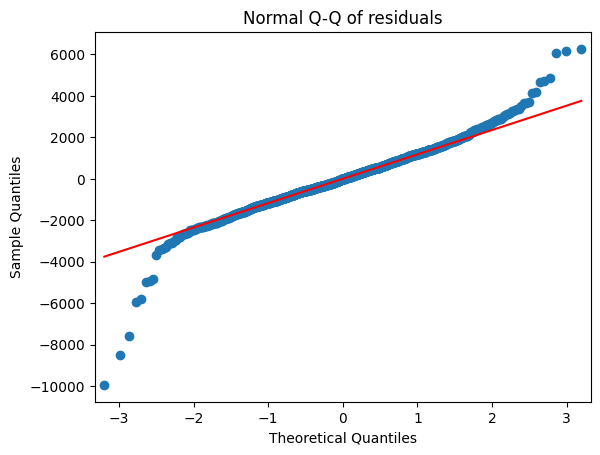

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q of residuals')
plt.show()

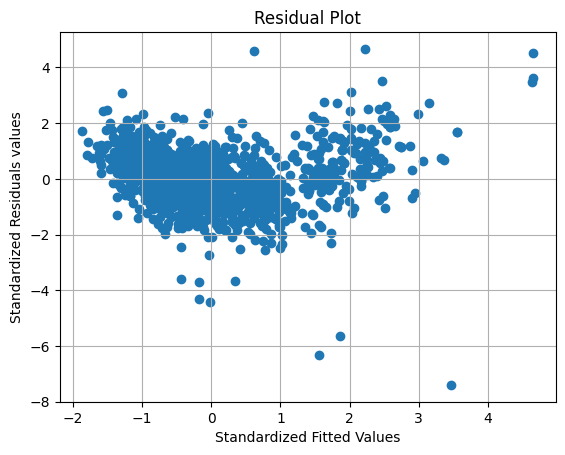

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals values')
plt.grid(True)
plt.show()

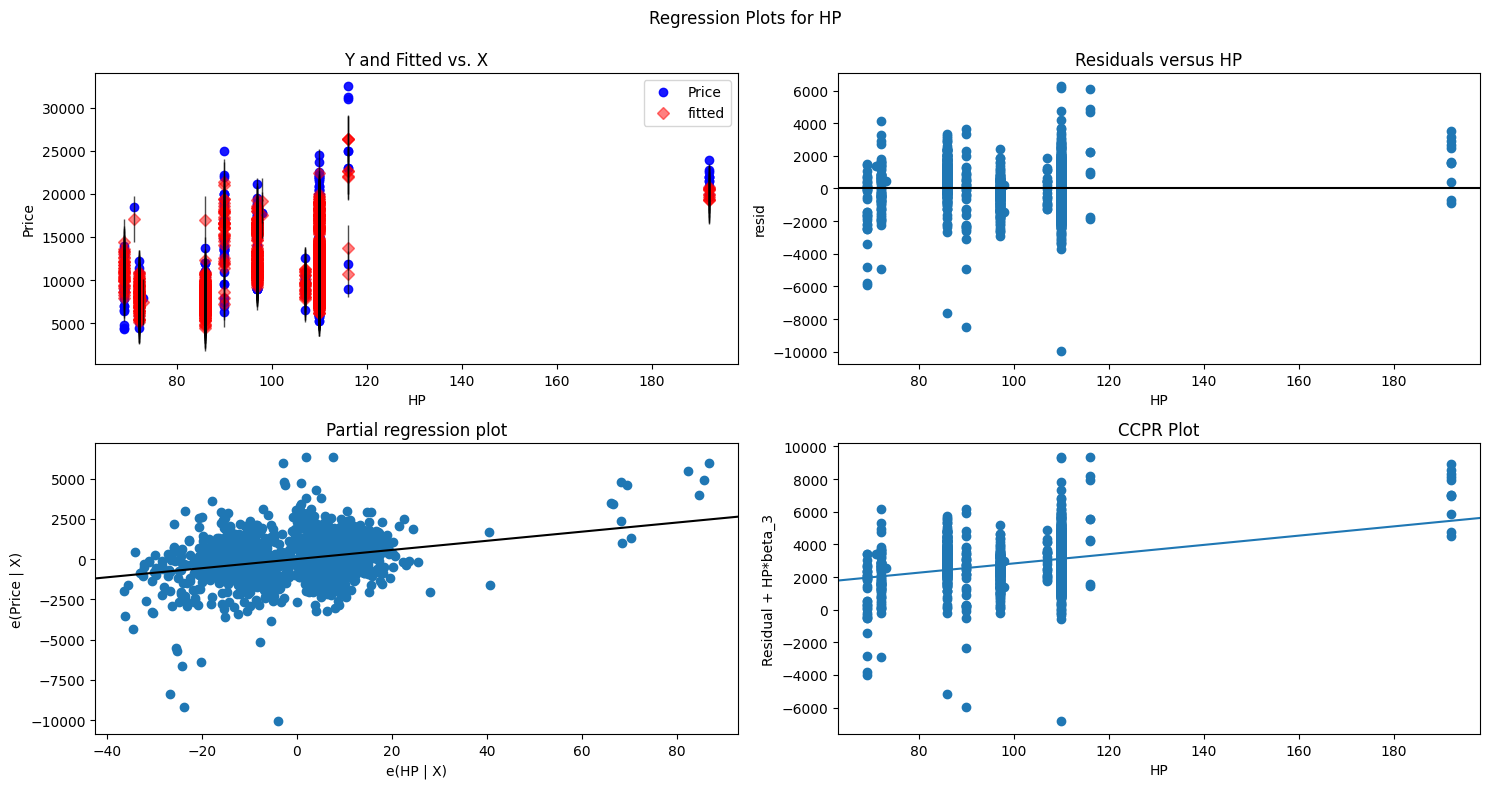

In [ ]:
 fig = plt.figure(figsize=(15,8))
 fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
 plt.show()

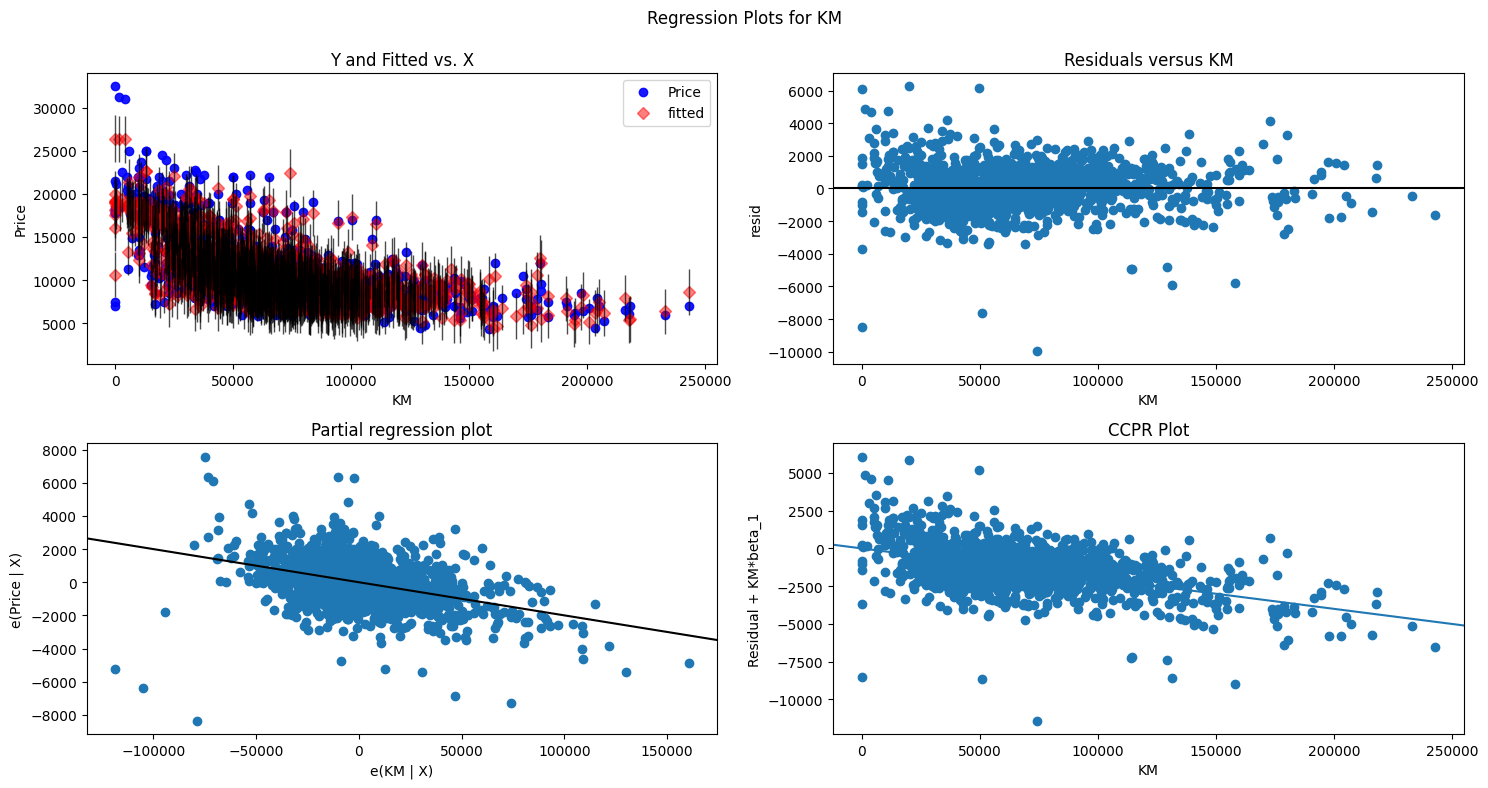

In [ ]:
 fig = plt.figure(figsize=(15,8))
 fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
 plt.show()

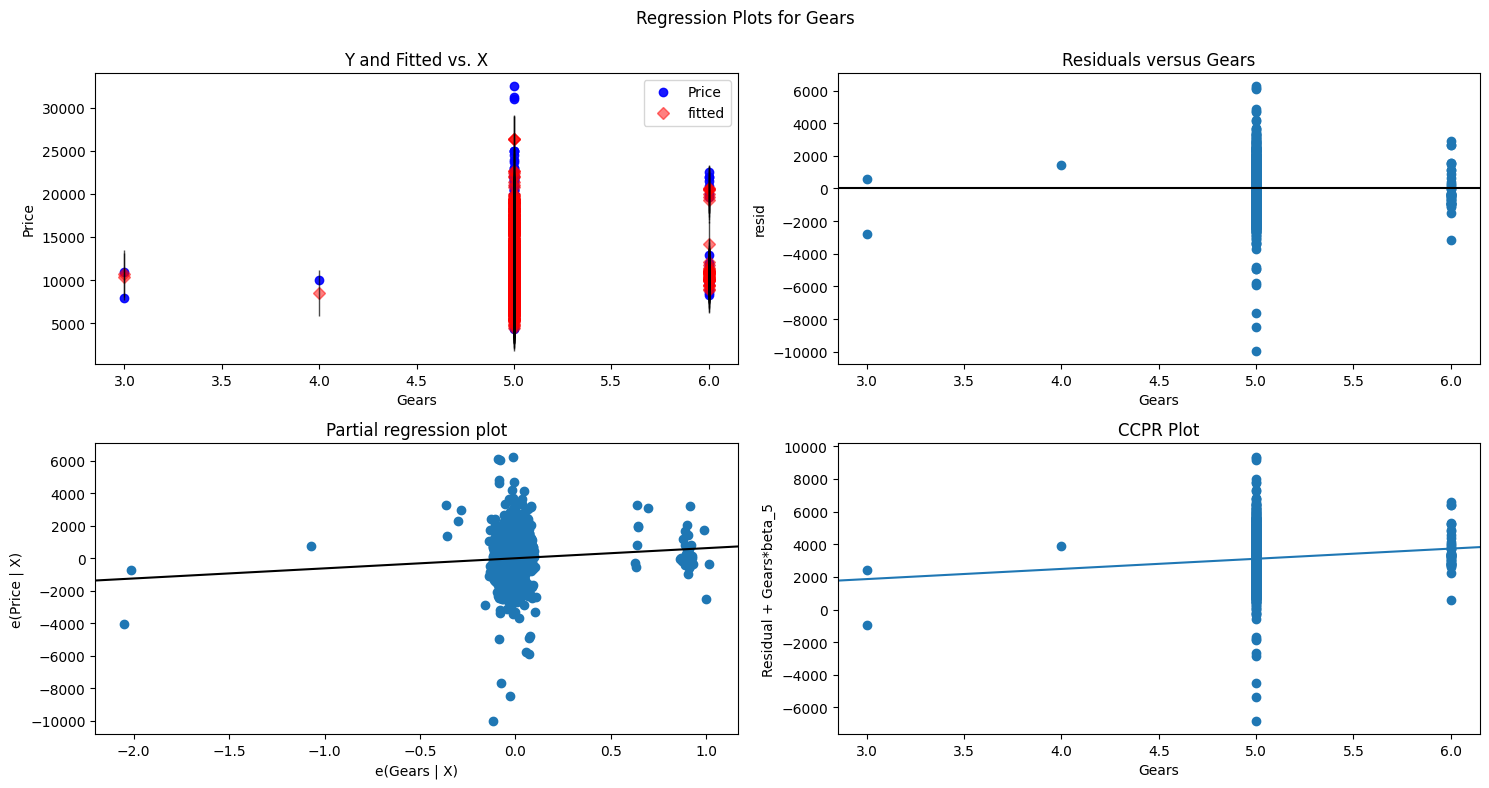

In [ ]:
 fig = plt.figure(figsize=(15,8))
 fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
 plt.show()

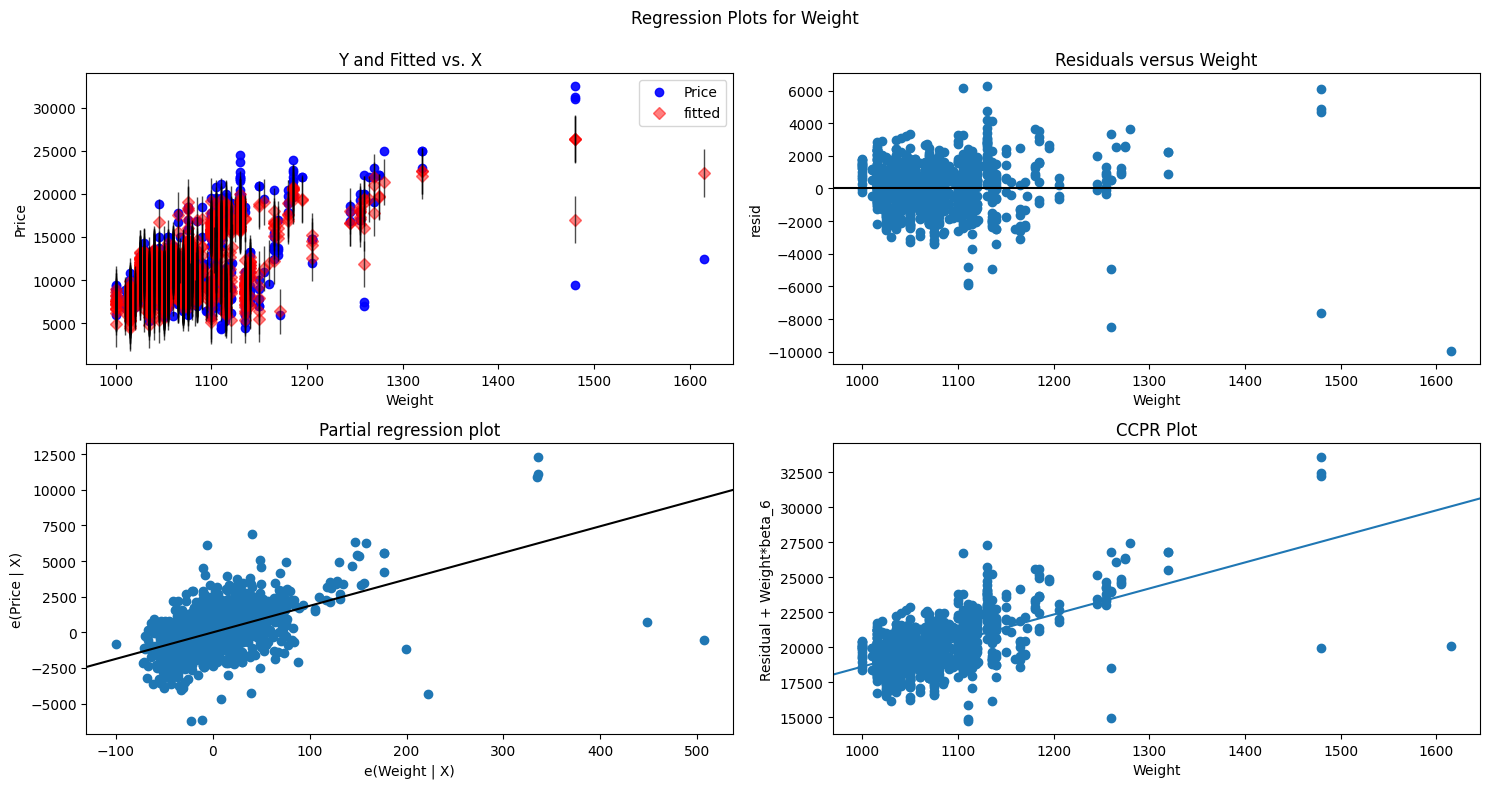

In [ ]:
 fig = plt.figure(figsize=(15,8))
 fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
 plt.show()

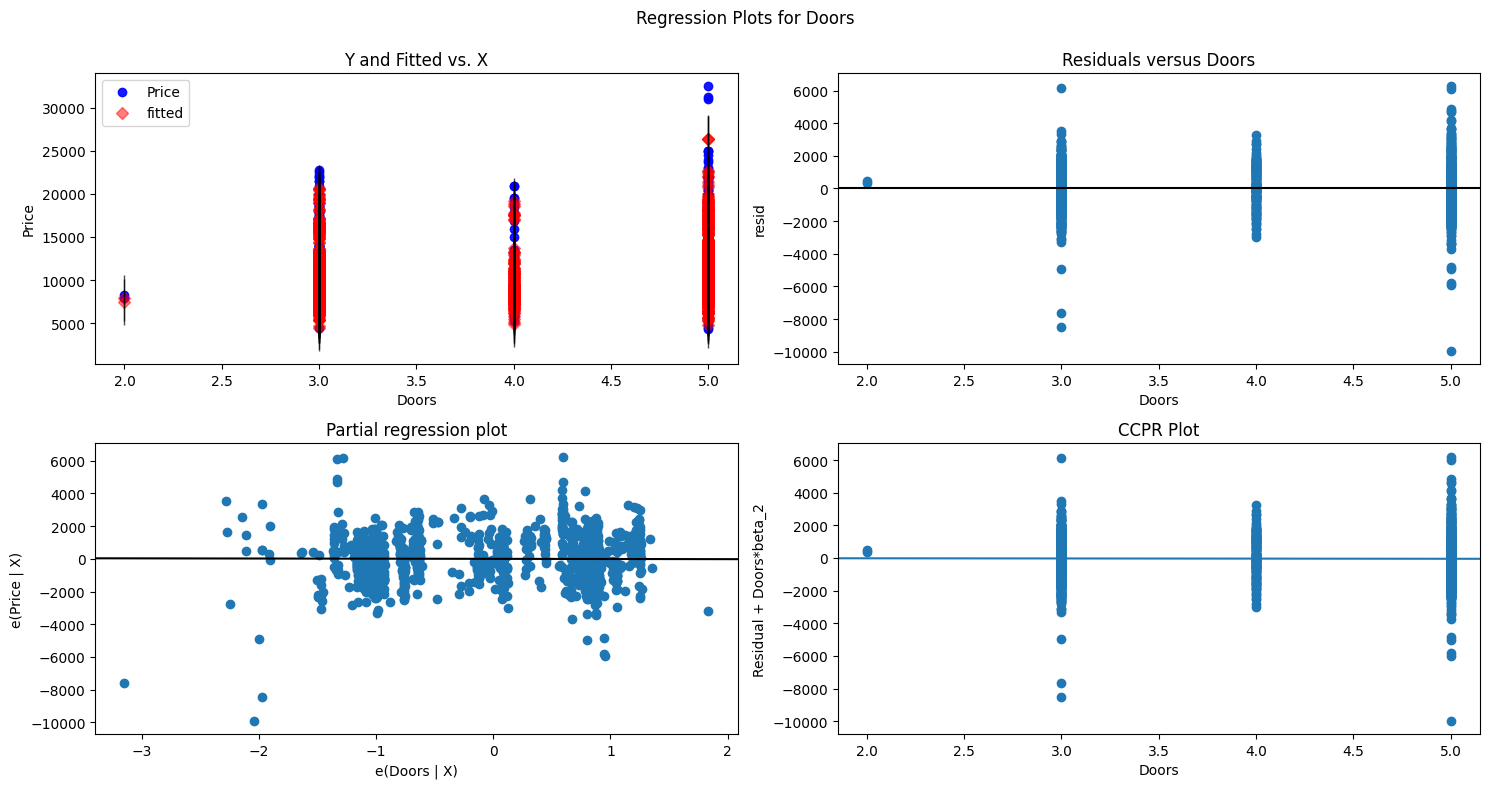

In [ ]:
 fig = plt.figure(figsize=(15,8))
 fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
 plt.show()

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

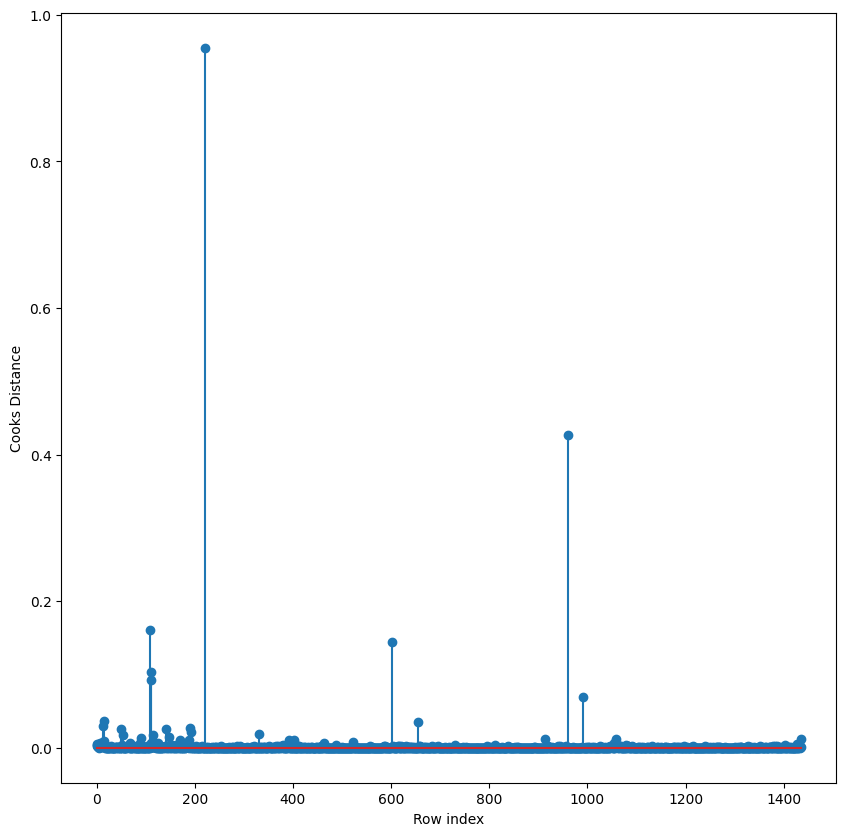

In [ ]:
fig = plt.subplots(figsize=(10,10))
plt.stem(np.arange(len(c)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

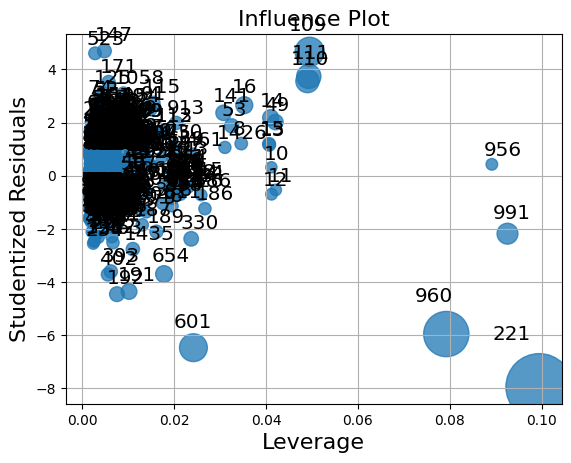

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model,alpha=0.5)
plt.grid(True)
plt.show()

In [ ]:
df[df.index.isin([956,991,960,221,654,523,147])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
147,149,TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-...,24500,13,19988,110,5,4,5,1130
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
523,526,ÊTOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors,18950,49,49568,110,3,4,5,1105
654,658,TOYOTA Corolla 2.0 D Linea Terra 3d 2/3-Doors,6950,65,114383,90,3,4,5,1260
956,960,TOYOTA Corolla 1.6 Linea Luna Aut. 4/5-Doors,10950,58,51421,110,5,4,3,1105
960,964,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480
991,996,TOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-Doors,7950,58,43000,110,4,4,3,1114


In [ ]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
cars_new = pd .read_csv(file_name)
cars_new

Saving Toyoto_Corrola.csv to Toyoto_Corrola (2).csv


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
car1 = cars_new.drop(cars_new.index[[956,991,960,221,654]],axis=0).reset_index()

In [ ]:
car1 = car1.drop(['index'],axis=1)
car1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1427,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1428,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1429,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
final_ml1 = smf.ols('Price~KM+Age_08_04',data=car1).fit()
final_ml1.rsquared

0.7902642136838732

In [ ]:
final_ml = smf.ols('Price~KM+Age_08_04+Gears+Weight+Doors',data=car1).fit()
final_ml.rsquared

0.864527675684723

In [ ]:
final_ml2 = smf.ols('Price~KM+Age_08_04+HP+Weight',data=car1).fit()
final_ml2.rsquared

0.8741548209228815

In [ ]:
final_ml3 = smf.ols('Price~KM+Age_08_04+Gears+Weight+HP',data=car1).fit()
final_ml3.rsquared

0.8746793357107763

In [1]:
print("Hello ishhhuuuuuu")

Hello ishhhuuuuuu
